### Geometric Optimization of Dose Distribution in Spatially Fractionated Radiation Therapy

Copyright (c) 2024 Seyedmohammadhossein Hosseinian. All rights reserved.

In [1]:
from gurobipy import *
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Agg')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import math
import pickle
import threading
import time
import concurrent.futures

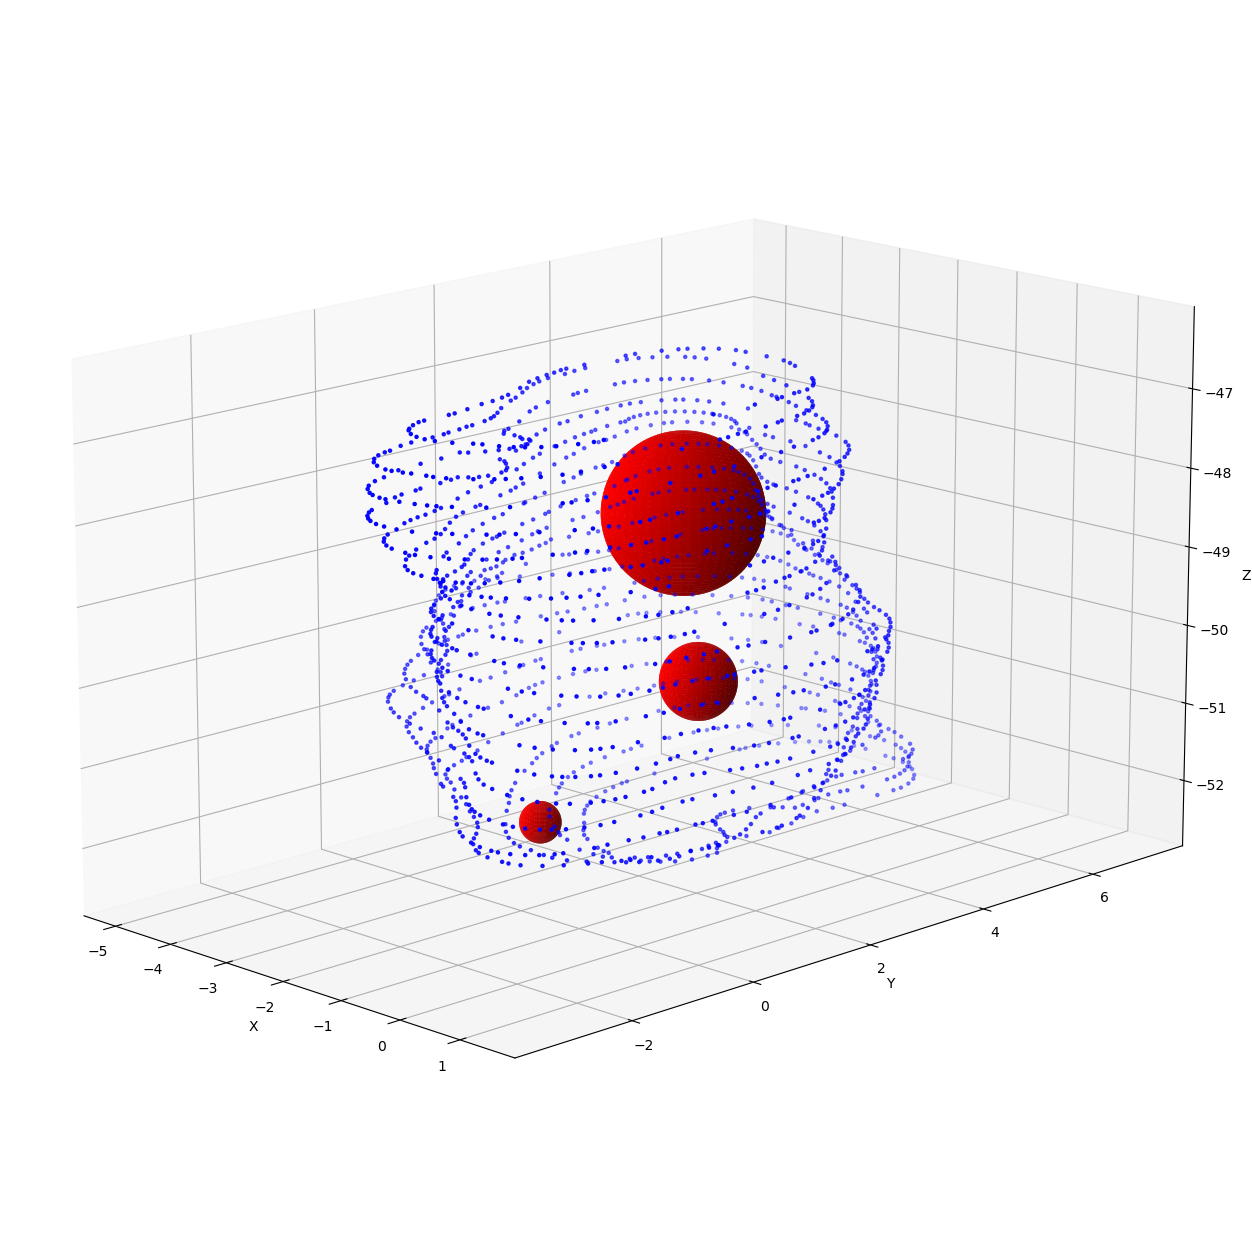

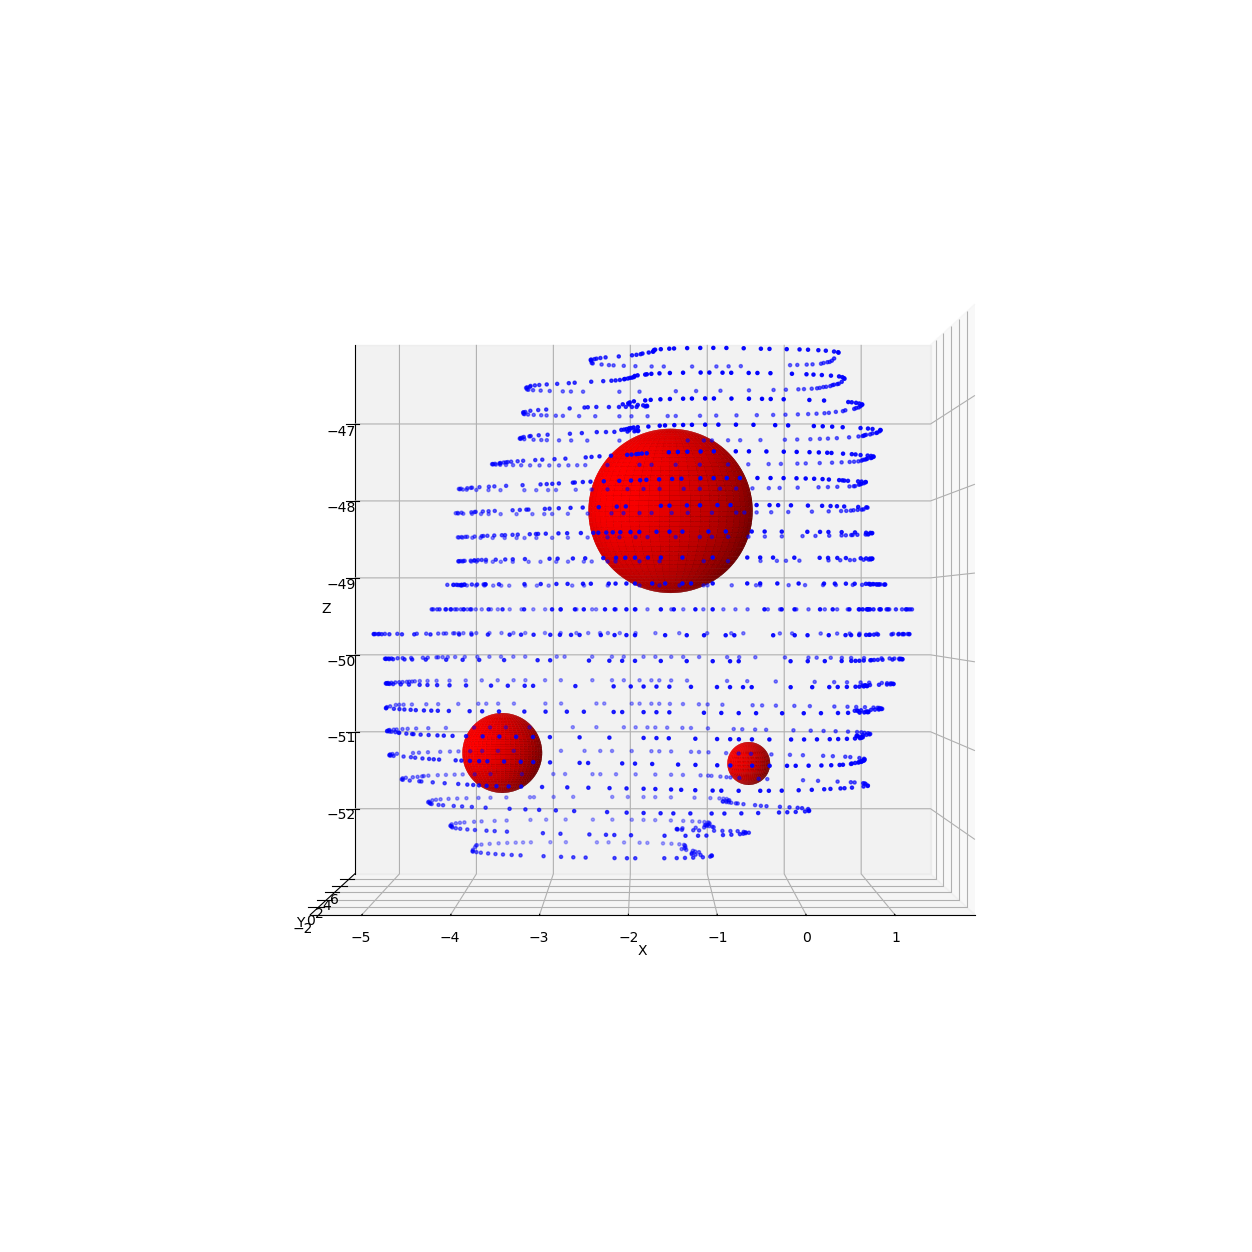

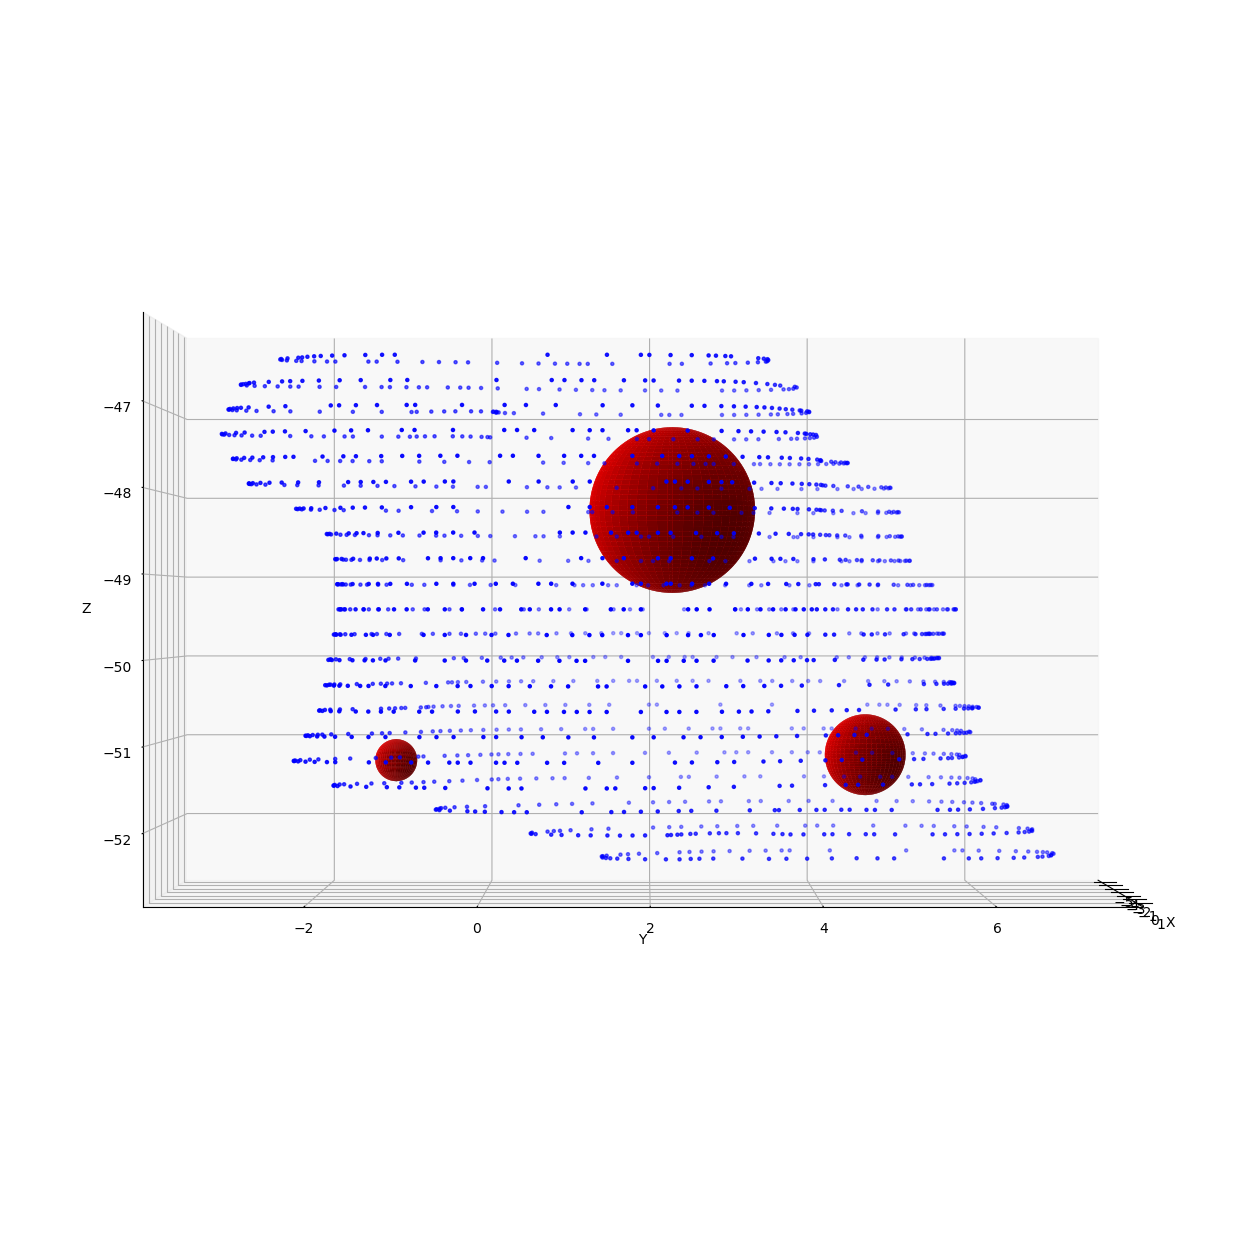

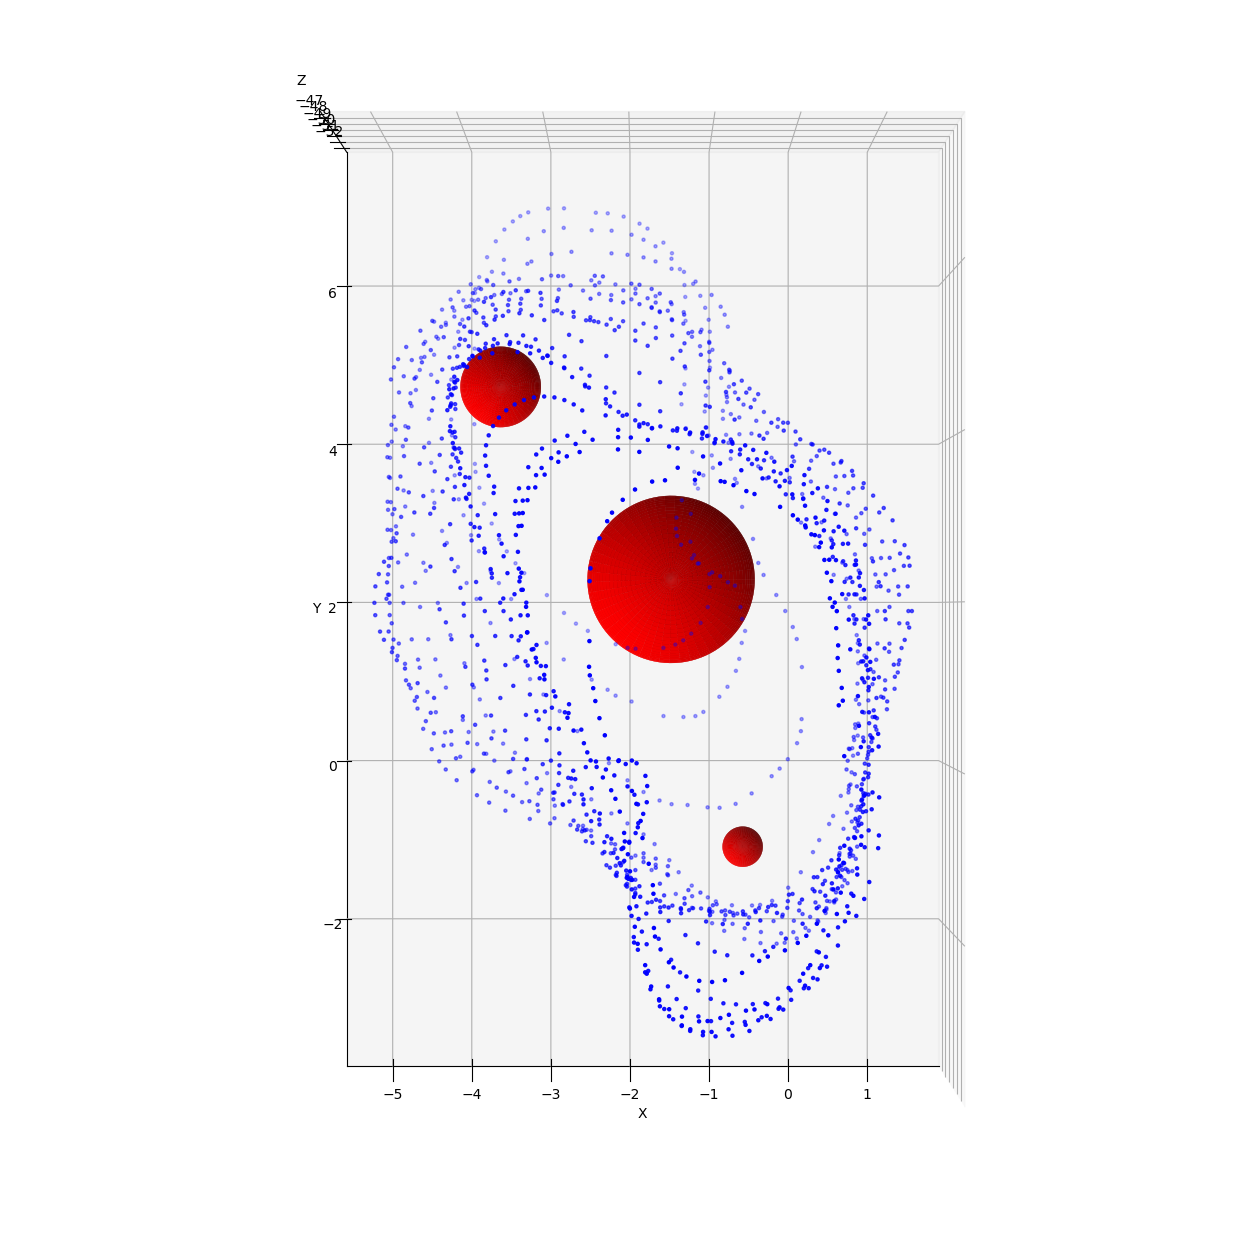

In [2]:
tumor = pd.read_csv('CH_GTV_GRID.csv')
xT = tumor['X']
yT = tumor['Y']
zT = tumor['Z']
with open('_feasReg.pkl', 'rb') as file:
    marg = pickle.load(file)
xmarg = []
ymarg = []
zmarg = []
for m in range(len(marg)):
    xmarg.append(marg[m][0])
    ymarg.append(marg[m][1])
    zmarg.append(marg[m][2])
C = [[-0.6, -1.03, -51.21], [-3.6, 4.67, -51.21], [-1.5, 2.27, -48.21]]
R = [0.25, 0.5, 1]
spacing = 0.3
#
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
#p.scatter(xmarg, ymarg, zmarg, color='lightcoral', marker='3', s=900*spacing, lw = 3)
for i in range(len(R)):
    center = C[i]
    radius = R[i]    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)    
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))    
    p.plot_surface(x, y, z, color='r')
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=15, azim=-45, roll=0)
p.set_aspect('equal')
plt.show()
#plt.savefig('IS_3D.png') 
#plt.close(fig) 
#
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
#p.scatter(xmarg, ymarg, zmarg, color='lightcoral', marker='3', s=900*spacing, lw = 3)
for i in range(len(R)):
    center = C[i]
    radius = R[i]    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)    
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))    
    p.plot_surface(x, y, z, color='r')
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=0, azim=270, roll=0)
p.set_aspect('equal')
plt.show()
#plt.savefig('IS_XZ.png') 
#plt.close(fig) 
#
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.set_box_aspect([1,1,1])
p.scatter(xT, yT, zT, color='b', marker='.')
#p.scatter(xmarg, ymarg, zmarg, color='lightcoral', marker='3', s=900*spacing, lw = 3)
for i in range(len(R)):
    center = C[i]
    radius = R[i]
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)    
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))    
    p.plot_surface(x, y, z, color='r')
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=0, azim=0, roll=0)
p.set_aspect('equal')
plt.show()
#plt.savefig('IS_YZ.png') 
#plt.close(fig) 
#
fig = plt.figure(figsize=(16,16))
p = fig.add_subplot(111, projection='3d')
p.scatter(xT, yT, zT, color='b', marker='.')
#p.scatter(xmarg, ymarg, zmarg, color='lightcoral', marker='3', s=900*spacing, lw = 3)
for i in range(len(R)):
    center = C[i]
    radius = R[i]
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)    
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))    
    p.plot_surface(x, y, z, color='r')
p.set_xlabel('X')
p.set_ylabel('Y')
p.set_zlabel('Z')
p.view_init(elev=90, azim=90, roll=180)
p.set_aspect('equal')
plt.show()
#plt.savefig('IS_XY.png') 
#plt.close(fig) 